In [1]:
# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
seeds_df = pd.read_csv("seeds-less-rows.csv")

In [3]:
seeds_df.head(43)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat
5,13.02,13.76,0.8641,5.395,3.026,3.373,4.825,Kama wheat
6,15.49,14.94,0.8724,5.757,3.371,3.412,5.228,Kama wheat
7,16.20,15.27,0.8734,5.826,3.464,2.823,5.527,Kama wheat
8,13.50,13.85,0.8852,5.351,3.158,2.249,5.176,Kama wheat
9,15.36,14.76,0.8861,5.701,3.393,1.367,5.132,Kama wheat


In [4]:
# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

In [5]:
seeds_df.head(10)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219
5,13.02,13.76,0.8641,5.395,3.026,3.373,4.825
6,15.49,14.94,0.8724,5.757,3.371,3.412,5.228
7,16.20,15.27,0.8734,5.826,3.464,2.823,5.527
8,13.50,13.85,0.8852,5.351,3.158,2.249,5.176
9,15.36,14.76,0.8861,5.701,3.393,1.367,5.132


In [6]:
# Extract the measurements as a NumPy array
samples = seeds_df.values

In [7]:
print(samples)

[[14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]
 [14.69   14.49    0.8799  5.563   3.259   3.586   5.219 ]
 [14.03   14.16    0.8796  5.438   3.201   1.717   5.001 ]
 [13.99   13.83    0.9183  5.119   3.383   5.234   4.781 ]
 [14.11   14.26    0.8722  5.52    3.168   2.688   5.219 ]
 [13.02   13.76    0.8641  5.395   3.026   3.373   4.825 ]
 [15.49   14.94    0.8724  5.757   3.371   3.412   5.228 ]
 [16.2    15.27    0.8734  5.826   3.464   2.823   5.527 ]
 [13.5    13.85    0.8852  5.351   3.158   2.249   5.176 ]
 [15.36   14.76    0.8861  5.701   3.393   1.367   5.132 ]
 [15.78   14.91    0.8923  5.674   3.434   5.593   5.136 ]
 [14.46   14.35    0.8818  5.388   3.377   2.802   5.044 ]
 [11.23   12.63    0.884   4.902   2.879   2.269   4.703 ]
 [14.34   14.37    0.8726  5.63    3.19    1.313   5.15  ]
 [16.84   15.67    0.8623  5.998   3.484   4.675   5.877 ]
 [17.32   15.91    0.8599  6.064   3.403   3.824   5.922 ]
 [18.72   16.19    0.8977  6.006   3.857   5.324   5.879

### Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument.
### Assign the result to mergings.


In [8]:
mergings = linkage(samples, method='complete')

### Plot a dendrogram using the dendrogram() function on mergings, specifying the keyword arguments labels=varieties, leaf_rotation=90, and leaf_font_size=6.


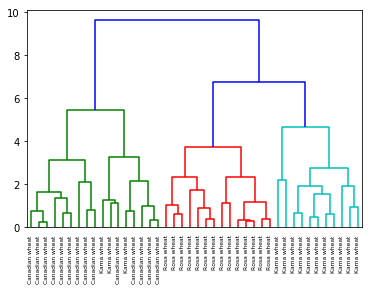

In [10]:
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()